In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\adishree.b\Documents\part 1 ass 2.csv")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df.head()

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,is_promoted
0,65438,Sales & Marketing,Master's & above,f,1,35,5.0,8,0
1,65141,Operations,Bachelor's,m,1,30,5.0,4,0
2,7513,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0
3,2542,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0
4,48945,Technology,Bachelor's,m,1,45,3.0,2,0


In [4]:
df.shape

(54808, 9)

### 1.	Split the data into 3 different sets like train, validate, and test using 60:20:20 ratio respectively

In [5]:
# First lets create the predictor variables (X) and target variable (y) by separating the dataset into 2: 

X = df.drop(columns = ['is_promoted'])
y = df['is_promoted']

print(X.shape)
print(y.shape)

(54808, 8)
(54808,)


In [6]:
# Since we have to split the dataset into train, test and validation dataset in (60:20:20) ratio, we will do it in 2 steps.
# Let's split the data into train and test dataset in (80:20) ratio:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now, let's split the train data into train and validation dataset in (75:25): which will result in the 60% and 20 % of whole dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(32884, 8)
(32884,)
(10962, 8)
(10962,)
(10962, 8)
(10962,)


In [8]:
print(y_train.count()/y.count())
print(y_test.count()/y.count())
print(y_val.count()/y.count())

0.5999854035907167
0.20000729820464166
0.20000729820464166


#### We can see that the train, test and validation dataset are in (60:20:20) ratio

### 2.	Randomize the data and do the splitting as per the instruction given in question #1

In [ ]:
# Since the split we have done in the Ques already has randomization by default, 
# Hence, we don't need to add/modify on the split we have done above.

### 3.	Set ‘Random seed number’ while randomizing to reproduce the same observations when you randomize the data. Run the experiment twice and see the if the observations and summary of the datasets are reproducible

In [9]:
# Using random_state argument on the split function to create a random seed number:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 1)

In [13]:
X_train.head()

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service
50013,28895,Analytics,Bachelor's,m,1,34,3.0,4
25219,20278,Sales & Marketing,Master's & above,m,1,29,1.0,2
15635,73030,Sales & Marketing,Master's & above,f,1,38,5.0,3
20957,32345,Sales & Marketing,Bachelor's,m,1,49,3.0,18
52348,40577,Sales & Marketing,NaN,m,1,29,5.0,2


In [10]:
# Checking the value counts of the y_train dataset to see if the dataset is reproducible
# running the experiment for first time and checking:

y_train.value_counts()

0    30085
1     2799
Name: is_promoted, dtype: int64

In [11]:
# running the experiment for second time and checking:

y_train.value_counts()

0    30085
1     2799
Name: is_promoted, dtype: int64

#### We can see that the value counts of y_train generated on both occasions are the same.

### 4.	Check whether the data is balanced by checking the target variable “is_promoted”

In [ ]:
# To check whether the is_promoted variable is balanced accross the 3 splits, we will:
# check the value_counts of all 3 splits in the percentage(normalized) form:

In [12]:
y_test.value_counts(normalize=True)

0    0.913976
1    0.086024
Name: is_promoted, dtype: float64

In [13]:
y_train.value_counts(normalize=True)

0    0.914883
1    0.085117
Name: is_promoted, dtype: float64

In [14]:
y_val.value_counts(normalize=True)

0    0.915526
1    0.084474
Name: is_promoted, dtype: float64

#### We can see that the distribution of 0's and 1's are amost same (91.5% and 8.5%) accross all the 3 splits.

### 5.	Create validation dataset using K-Fold cross validation method

In [15]:
# To use the K-Fold cross validation method, we will use a model (knn in this case since it is a categorical label)
# We will use the sklearn packages to carry out the process

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [16]:
df.isnull().sum()

employee_id                0
department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
is_promoted                0
dtype: int64

In [32]:
df_knn = df.dropna()

In [33]:
# let convert department in numeric
df_knn['department'].value_counts()

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: department, dtype: int64

In [34]:
df_knn['department'].replace('Sales & Marketing',1,inplace=True)
df_knn['department'].replace('Operations',2,inplace=True)
df_knn['department'].replace('Procurement',3,inplace=True)
df_knn['department'].replace('Technology',4,inplace=True)
df_knn['department'].replace('Analytics',5,inplace=True)
df_knn['department'].replace('Finance',6,inplace=True)
df_knn['department'].replace('HR',7,inplace=True)
df_knn['department'].replace('R&D',8,inplace=True)
df_knn['department'].replace('Legal',9,inplace=True)
df_knn.head()

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,is_promoted
0,65438,1,Master's & above,f,1,35,5.0,8,0
1,65141,2,Bachelor's,m,1,30,5.0,4,0
2,7513,1,Bachelor's,m,1,34,3.0,7,0
3,2542,1,Bachelor's,m,2,39,1.0,10,0
4,48945,4,Bachelor's,m,1,45,3.0,2,0


In [35]:
# let convert gender in numeric
df_knn['gender'].value_counts()

m    33852
f    14808
Name: gender, dtype: int64

In [36]:
df_knn['gender'].replace('m',0,inplace=True)
df_knn['gender'].replace('f',1,inplace=True)
df_knn.head()

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,is_promoted
0,65438,1,Master's & above,1,1,35,5.0,8,0
1,65141,2,Bachelor's,0,1,30,5.0,4,0
2,7513,1,Bachelor's,0,1,34,3.0,7,0
3,2542,1,Bachelor's,0,2,39,1.0,10,0
4,48945,4,Bachelor's,0,1,45,3.0,2,0


In [37]:
# let convert education in numeric
df_knn['education'].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

In [38]:
df_knn['education'].replace("Bachelor's",1,inplace=True)
df_knn['education'].replace("Master's & above",2,inplace=True)
df_knn['education'].replace('Below Secondary',3,inplace=True)
df_knn.head()

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,is_promoted
0,65438,1,2,1,1,35,5.0,8,0
1,65141,2,1,0,1,30,5.0,4,0
2,7513,1,1,0,1,34,3.0,7,0
3,2542,1,1,0,2,39,1.0,10,0
4,48945,4,1,0,1,45,3.0,2,0


In [39]:
y=df_knn['is_promoted']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [40]:
x=df_knn.iloc[:,1:]
x.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,is_promoted
0,1,2,1,1,35,5.0,8,0
1,2,1,0,1,30,5.0,4,0
2,1,1,0,1,34,3.0,7,0
3,1,1,0,2,39,1.0,10,0
4,4,1,0,1,45,3.0,2,0


In [41]:
# let's split the data into train and test and use k-cross validation to find the best model.

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [42]:
# using Kfold cross validation with 5 folds (cv = 5) and 5 neighbors and measuring the accuracy with cross_val_score:

knn_cross = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn_cross, x,y,cv=5,scoring="accuracy")
scores

array([0.94842289, 0.94996404, 0.94882861, 0.9495427 , 0.94913164])

In [43]:
scores.mean()

0.9491779754913416

In [44]:
# finding the n-neighbors where the accurate is the highest:

k_range = range(1,20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scoring = cross_val_score(knn, x,y,cv=5,scoring="accuracy")
    k_scores.append(scoring.mean())
print(k_scores)

[0.9616728400220577, 0.942540092498462, 0.9547266618368055, 0.9407932672982126, 0.9491779754913416, 0.9380395012835627, 0.9450472831800484, 0.9354294892310243, 0.9407110536959692, 0.9334977515235197, 0.9376900897854977, 0.9313399005493354, 0.9351623377901801, 0.929901307190093, 0.9330455608852745, 0.9282983478688817, 0.9312987166767513, 0.9273118712401279, 0.9291819777779784]


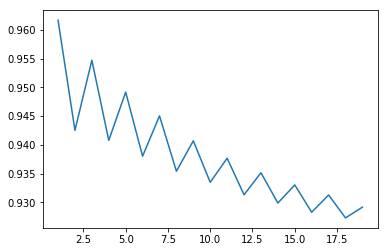

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel = ('valuse of k in knn')
plt.ylabel = ("Cross_validation accuracy")

In [31]:
# here, using the 3 neighbors has the highest mean accuracy

#### Hence, we can see how using KFold cross validation can help in usind different variations of training datasets to get the best model